# Notes for Bias-Variance Trade-off
### Assignment 1
#### Posted  by Lingtian Bu on October 21, 2019

## 1 Introduction

From previous study, we learned that there's always a trade-off between approximation and generalization when we are choosing a model to fit our data. To interprent this in statistical sense, it can be the task of "bias-variance trade-off". In this assignment, I will first review the definition of bias and variance in fitting process. Then, a introduction of "k-Nearest Neighbors" will be shown with simulated data to intuitively understand the bias-variance trade-off. The final part is the journey to explore methods that may help us to manage the problem.

## 2 Bias vs Variance
In data fitting process, it's necessary for us to distinguish the sources of error. As long as we know whether it comes from bias or variance, we can work to seek methods to get rid of it. So first let's review what bias and variance exactly are.
### 2.1 Conceptual Definition
#### 2.1.1 Error due to bias
Bias is the difference between the expected prediction of our model and the ture value of underline population which we are trying to predict.
#### 2.1.2 Error due to variance
variance measures the variability of a model prediction for a given data point. It is how much the predictions for a given point vary between different realizations of the model.
### 2.2 Graphical Definition
Usually a visual way to explain the difference between bias and variance is "bulls-eya diagram" in which the center of the target is our target of fitting the sample data well with the true population. Bias values how far our model is from the center while variance how large the model varies from its expectation.

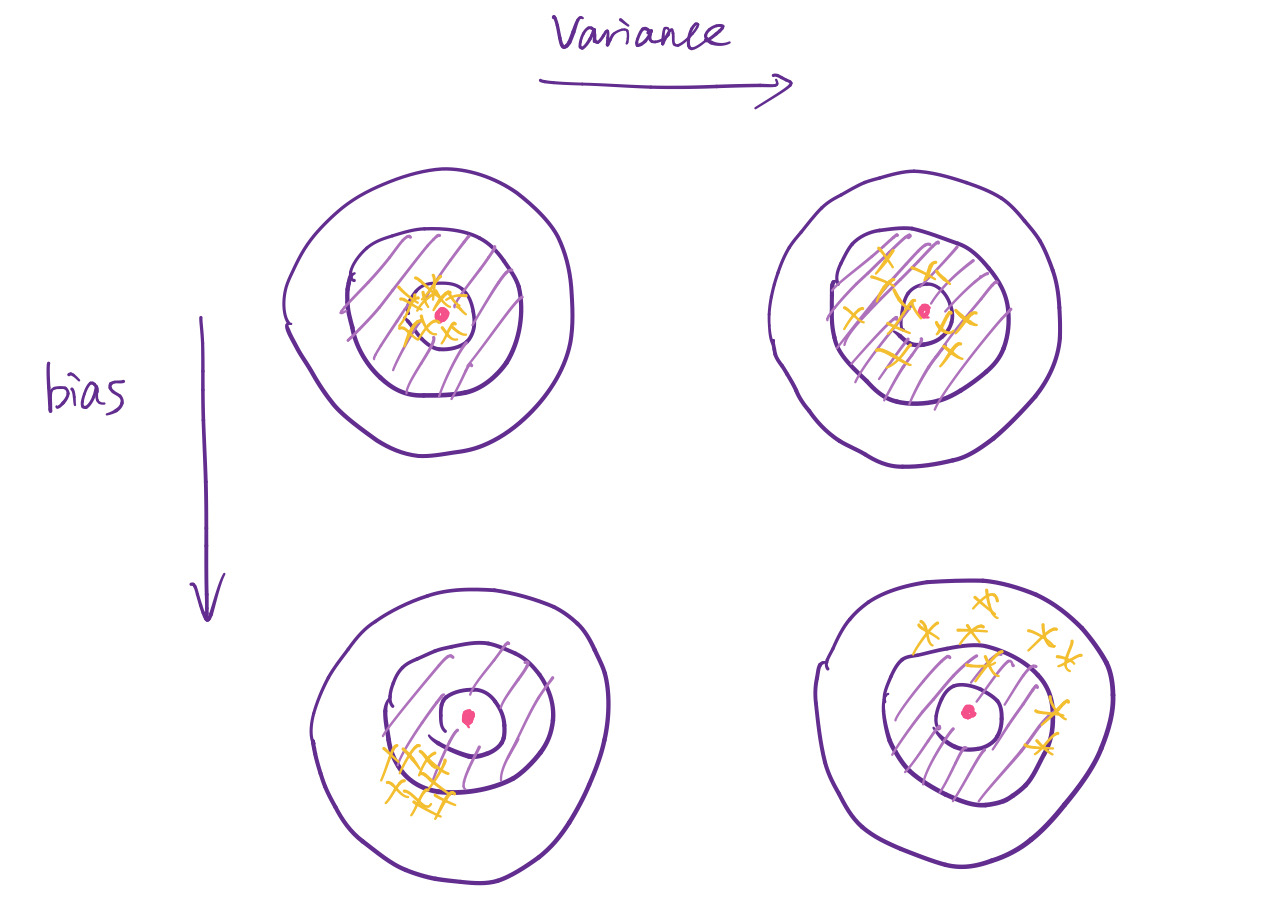

In [2]:
from IPython.display import Image
PATH = "D:/study/microeconometrics/assignment1/"
Image(filename = PATH + "bias-variance.jpg", width=1000, height=800)

### 2.3 Mathematical Defination -- Decomposition of expected test error
Given a dataset $$D{\rm{ = }}\left\{ {\left( {{x_1},{y_1}} \right), \ldots ,\left( {{x_n},{y_n}} \right)} \right\}$$ drawn i.i.d. from a population $P(X,Y)$ containing $n$ inputs, we fit them using a hypothese(model) $$H = \left\{ {{h_1},{h_2}, \ldots ,{h_m}} \right\}$$ The expected test error is



$$\eqalign{
  & {E_{x,y,D}}\left[ {{{\left[ {{h_D}\left( x \right) - y} \right]}^2}} \right] = {E_{x,y,D}}\left[ {{{\left[ {\left( {{h_D}\left( x \right) - \bar h\left( x \right)} \right) + \left( {\bar h\left( x \right) - y} \right)} \right]}^2}} \right]  \cr 
  &  \Rightarrow {E_{x,y,D}}\left[ {{{\left[ {{h_D}\left( x \right) - y} \right]}^2}} \right] = {E_{x,D}}\left[ {{{\left( {{h_D}\left( x \right) - \bar h\left( x \right)} \right)}^2}} \right] + 2{E_{x,y,D}}\left[ {\left( {{h_D}\left( x \right) - \bar h\left( x \right)} \right)\left( {\bar h\left( x \right) - y} \right)} \right] + {E_{x,y}}\left[ {{{\left( {\bar h\left( x \right) - y} \right)}^2}} \right] \cr} $$
  
  
  
The we can show that the middle term equals to 0:



$$\eqalign{
  & {E_{x,y,D}}\left[ {\left( {{h_D}\left( x \right) - \bar h\left( x \right)} \right)\left( {\bar h\left( x \right) - y} \right)} \right] = {E_{x,y}}\left[ {{E_D}\left[ {{h_D}\left( x \right) - \bar h\left( x \right)} \right]\left( {\bar h\left( x \right) - y} \right)} \right]  \cr 
  &  \Rightarrow {E_{x,y,D}}\left[ {\left( {{h_D}\left( x \right) - \bar h\left( x \right)} \right)\left( {\bar h\left( x \right) - y} \right)} \right] = {E_{x,y}}\left[ {\left( {{E_D}\left[ {{h_D}\left( x \right)} \right] - \bar h\left( x \right)} \right)\left( {\bar h\left( x \right) - y} \right)} \right]  \cr 
  &  \Rightarrow {E_{x,y,D}}\left[ {\left( {{h_D}\left( x \right) - \bar h\left( x \right)} \right)\left( {\bar h\left( x \right) - y} \right)} \right] = {E_{x,y}}\left[ {\left( {\bar h\left( x \right) - \bar h\left( x \right)} \right)\left( {\bar h\left( x \right) - y} \right)} \right]  \cr 
  &  \Rightarrow {E_{x,y,D}}\left[ {\left( {{h_D}\left( x \right) - \bar h\left( x \right)} \right)\left( {\bar h\left( x \right) - y} \right)} \right] = {E_{x,y}}\left[ 0 \right]  \cr 
  &  \Rightarrow {E_{x,y,D}}\left[ {\left( {{h_D}\left( x \right) - \bar h\left( x \right)} \right)\left( {\bar h\left( x \right) - y} \right)} \right] = 0 \cr} $$



Then return to our first equation, we have:



$${E_{x,y,D}}\left[ {{{\left[ {{h_D}\left( x \right) - y} \right]}^2}} \right] = \underbrace {{E_{x,D}}\left[ {{{\left( {{h_D}\left( x \right) - \bar h\left( x \right)} \right)}^2}} \right]}_{Variance} + {E_{x,y}}\left[ {{{\left( {\bar h\left( x \right) - y} \right)}^2}} \right]$$



For the second term of the addition, we can break down as follows:



$$\eqalign{
  & {E_{x,y}}\left[ {{{\left( {\bar h\left( x \right) - y} \right)}^2}} \right] = {E_{x,y}}\left[ {{{\left( {\left( {\bar h\left( x \right) - \bar y\left( x \right)} \right) + \left( {\bar y\left( x \right) - y} \right)} \right)}^2}} \right]  \cr 
  &  \Rightarrow {E_{x,y}}\left[ {{{\left( {\bar h\left( x \right) - y} \right)}^2}} \right] = \underbrace {{E_{x,y}}\left[ {{{\left( {\bar y\left( x \right) - y} \right)}^2}} \right]}_{Noise} + \underbrace {{E_x}\left[ {{{\left( {\bar h\left( x \right) - \bar y\left( x \right)} \right)}^2}} \right]}_{Bia{s^2}} + 2{E_{x,y}}\left[ {\left( {\bar h\left( x \right) - \bar y\left( x \right)} \right)\left( {\bar y\left( x \right) - y} \right)} \right] \cr} $$
  


Also, we will proof the third term in the last equation is 0:



$$\eqalign{
  & {E_{x,y}}\left[ {\left( {\bar h\left( x \right) - \bar y\left( x \right)} \right)\left( {\bar y\left( x \right) - y} \right)} \right] = {E_x}\left[ {\left( {\bar h\left( x \right) - \bar y\left( x \right)} \right){E_{y\left| x \right.}}\left[ {\bar y\left( x \right) - y} \right]} \right]  \cr 
  &  \Rightarrow {E_{x,y}}\left[ {\left( {\bar h\left( x \right) - \bar y\left( x \right)} \right)\left( {\bar y\left( x \right) - y} \right)} \right] = {E_x}\left[ {\left( {\bar h\left( x \right) - \bar y\left( x \right)} \right){E_{y\left| x \right.}}\left[ {\bar y\left( x \right) - {E_{y\left| x \right.}}\left[ y \right]} \right]} \right]  \cr 
  &  \Rightarrow {E_{x,y}}\left[ {\left( {\bar h\left( x \right) - \bar y\left( x \right)} \right)\left( {\bar y\left( x \right) - y} \right)} \right] = {E_x}\left[ {\left( {\bar h\left( x \right) - \bar y\left( x \right)} \right){E_{y\left| x \right.}}\left[ {\bar y\left( x \right) - \bar y\left( x \right)} \right]} \right]  \cr 
  &  \Rightarrow {E_{x,y}}\left[ {\left( {\bar h\left( x \right) - \bar y\left( x \right)} \right)\left( {\bar y\left( x \right) - y} \right)} \right] = {E_x}\left[ 0 \right]  \cr 
  &  \Rightarrow {E_{x,y}}\left[ {\left( {\bar h\left( x \right) - \bar y\left( x \right)} \right)\left( {\bar y\left( x \right) - y} \right)} \right] = 0 \cr} $$
  
  

Finally, it gives us the decomposition of expected test error:



$$\underbrace {{E_{x,y,D}}\left[ {{{\left[ {{h_D}\left( x \right) - y} \right]}^2}} \right]}_{Expected\;\;Test\;\;Error} = \underbrace {{E_{x,D}}\left[ {{{\left( {{h_D}\left( x \right) - \bar h\left( x \right)} \right)}^2}} \right]}_{Variance} + \underbrace {{E_{x,y}}\left[ {{{\left( {\bar y\left( x \right) - y} \right)}^2}} \right]}_{Noise} + \underbrace {{E_x}\left[ {{{\left( {\bar h\left( x \right) - \bar y\left( x \right)} \right)}^2}} \right]}_{Bia{s^2}}$$

## 3  k-Nearest Neighbors
In many times, we have binary data and we want to find some way to distinguish them. One very flexible machine-learning technique is a method called k-Nearest Neighbors. k-nearest neighbors (KNN) algorithm uses 'feature similarity' to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. Example for that can be surely you have shopped on Taobao! Have you ever noticed that when you buy a product, Taobao gives you a list of recommendations based on your purchase? Not only this, Taobao displays a section which says, 'customers who bought this item also bought this.'. Based on this logic I designed a program and tested it using simulated data.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax

In [4]:
DataSize = 500

ScatterCluster1_X = 1.6*np.random.randn(DataSize,1) + 1
ScatterCluster1_Y = 1.5*np.random.randn(DataSize,1) + 1
ScatterCluster1_Z = np.ones((DataSize,1))

ScatterCluster2_X = 0.8*np.random.randn(DataSize,1) + 5
ScatterCluster2_Y = 1.5*np.random.randn(DataSize,1) + 7
ScatterCluster2_Z = 2 * np.ones((DataSize,1))

ScatterCluster3_X = 1*np.random.randn(DataSize,1) + 9
ScatterCluster3_Y = 2*np.random.randn(DataSize,1) + 0
ScatterCluster3_Z = 4 * np.ones((DataSize,1))


ScatterPoints1 = np.hstack((ScatterCluster1_X, ScatterCluster1_Y, ScatterCluster1_Z))
ScatterPoints2 = np.hstack((ScatterCluster2_X, ScatterCluster2_Y, ScatterCluster2_Z))
ScatterPoints3 = np.hstack((ScatterCluster3_X, ScatterCluster3_Y, ScatterCluster3_Z))
ScatterPoints = np.vstack((ScatterPoints1, ScatterPoints2, ScatterPoints3))

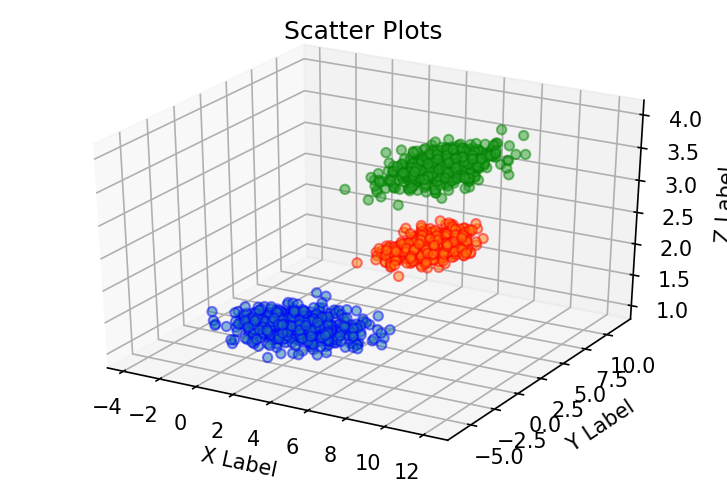

In [6]:
fig1 = plt.figure(1)
ax = fig1.add_subplot(111, projection = '3d')
plt.title("Scatter Plots") 
plt.rcParams['savefig.dpi'] = 400 #图片像素
plt.rcParams['figure.dpi'] = 600 #分辨率
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#基于ax变量绘制三维图
#xs表示x方向的变量
#ys表示y方向的变量
#zs表示z方向的变量，这三个方向上的变量都可以用list的形式表示
#m表示点的形式，o是圆形的点，^是三角形（marker)
#c表示颜色（color for short）
ax.scatter(ScatterCluster1_X, ScatterCluster1_Y, ScatterCluster1_Z, marker='o', edgecolors='b', alpha=0.5) 
ax.scatter(ScatterCluster2_X, ScatterCluster2_Y, ScatterCluster2_Z, marker='o', edgecolors='r', alpha=0.5)
ax.scatter(ScatterCluster3_X, ScatterCluster3_Y, ScatterCluster3_Z, marker='o', edgecolors='g', alpha=0.5)
#设置坐标轴
#显示图像
plt.show()

In [7]:
index = 40

testpoints_X = np.linspace(-7,13,index)
testpoints_Y = np.linspace(-7,13,index)
testpoints_XY = np.empty((index*index,2))
for i in range(index):
    for j in range(index):
        testpoints_XY[j+i*index] = np.append(testpoints_X[j],testpoints_Y[i])
testpoints_Z = np.zeros((index,index))
[testpoints_X,testpoints_Y] = np.meshgrid(testpoints_X,testpoints_Y)

truth = np.append([1]*500,[2]*500)
truth = np.append(truth,[3]*500)

In [8]:
'''KNN:K-临近算法'''
def distance(point,scatter):
    '''计算样本点之间的距离
    :param point  (mat,1×2):数据点
    :param scatter(mat,n×2):样本点
    :return:dis   (mat,n×2):样本点之间的距离
    '''
    m, n = np.shape(scatter)
    r, s = np.shape(point)
    dis = np.mat(np.zeros((r, m)))
    for i in range(r):
        for j in range(m):
            # 计算i和j之间的欧式距离
            tmp = 0
            for k in range(s):
                tmp += (point[i, k] - scatter[j, k]) * (point[i, k] - scatter[j, k])
            dis[i, j] = np.sqrt(tmp)
    return dis

In [9]:
testpoints_EuclidDis = distance(testpoints_XY,ScatterPoints)

k = 30
m = np.shape(testpoints_XY)[0]
lable = [0]*m
for i in range(m):
    count = 1
    innerpoints = []
    num = []
    everyptdis = testpoints_EuclidDis[i]
    everyptdis = np.transpose(everyptdis)
    everyptdis = everyptdis.tolist()
    while count <= k:
        findpt = everyptdis.index(min(everyptdis))
        del everyptdis[findpt]
        innerpoints.append(findpt)
        count += 1
    for j in range(3):
        num.append(np.sum(list(map(lambda x: truth[x] == j+1, innerpoints))))
    lable[i] = num.index(max(num)) + 1

testpoints_Z = np.matrix(lable, dtype=float)
testpoints_Z = np.transpose(testpoints_Z)
testpoints = np.hstack((testpoints_XY, testpoints_Z))
testpoints_Z = testpoints_Z.reshape((40,40))

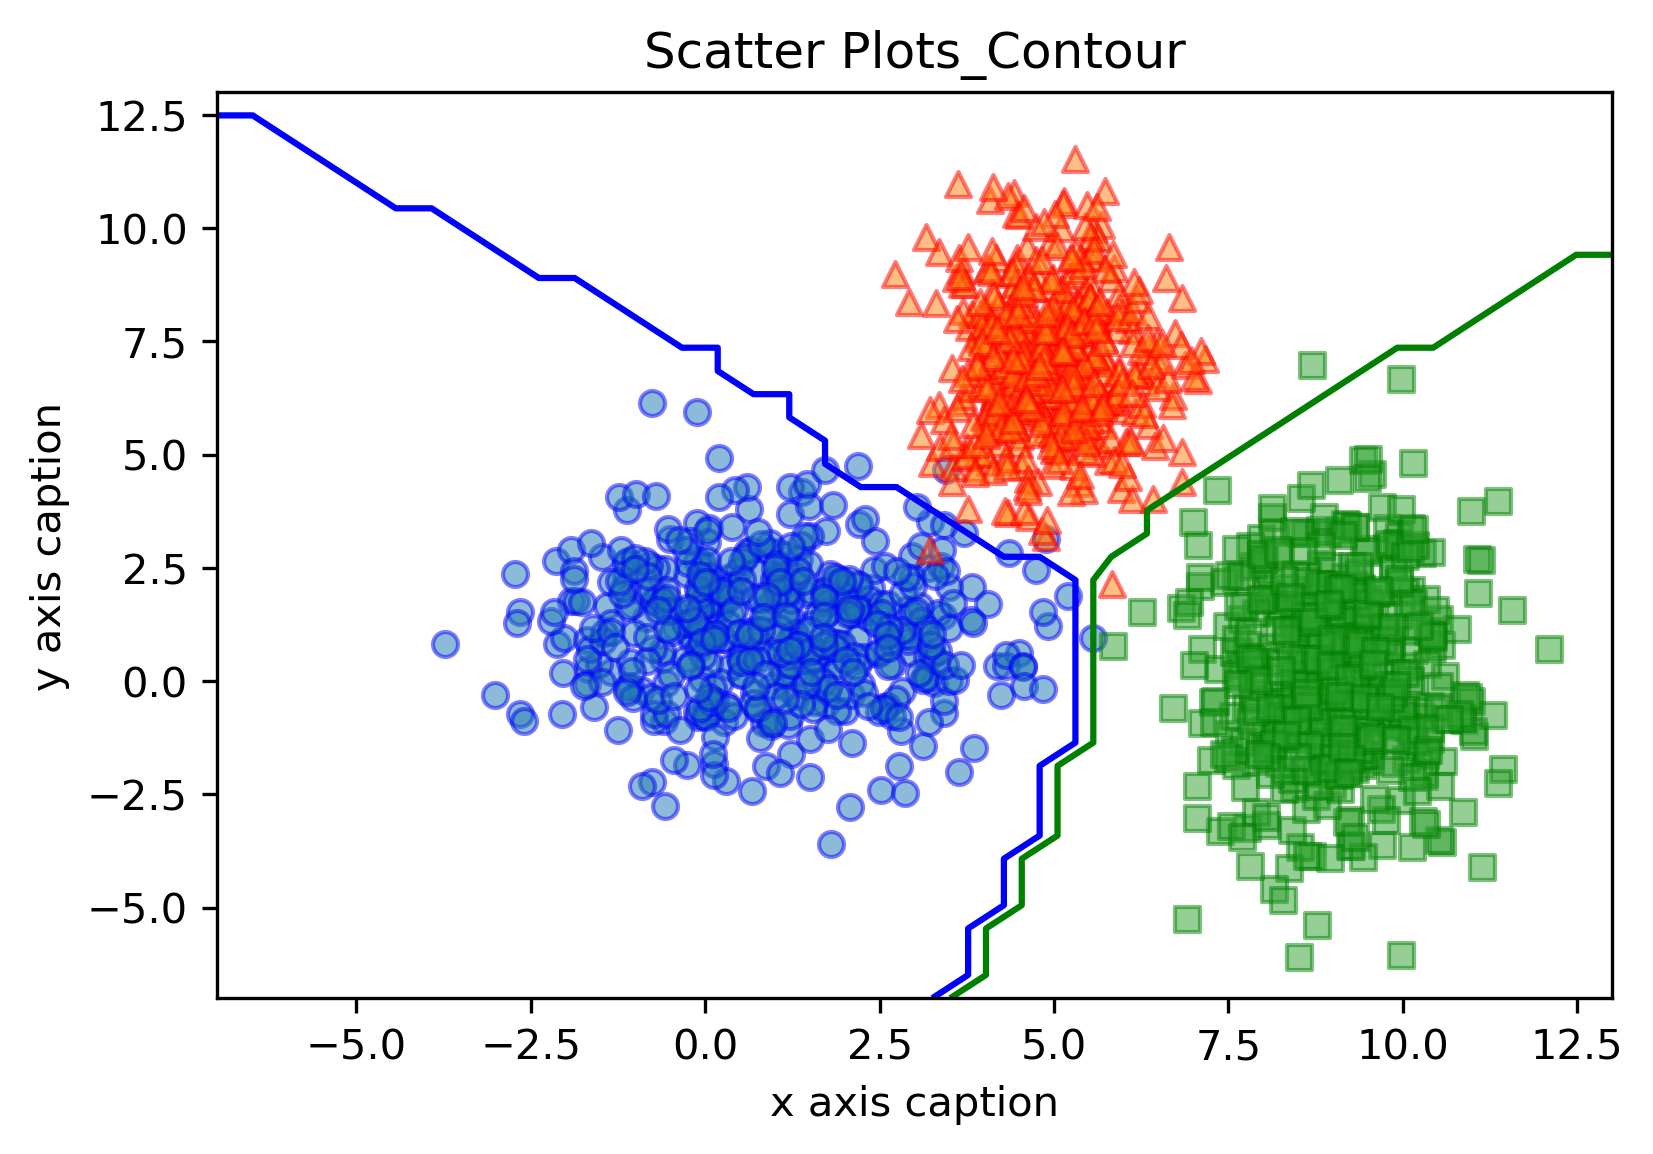

In [16]:
Fig2 = plt.figure(2)
plt.title("Scatter Plots_Contour")
plt.xlabel("x axis caption")
plt.ylabel("y axis caption")
plt.rcParams['savefig.dpi'] = 200 #图片像素
plt.rcParams['figure.dpi'] = 200 #分辨率
plt.scatter(ScatterCluster1_X, ScatterCluster1_Y, marker='o', edgecolors='blue', alpha=0.5)
plt.scatter(ScatterCluster2_X, ScatterCluster2_Y, marker='^', edgecolors='red', alpha=0.5)
plt.scatter(ScatterCluster3_X, ScatterCluster3_Y, marker='s', edgecolors='green', alpha=0.5)
plt.xlim(-7,13)
plt.ylim(-7,13)
plt.contour(testpoints_X,testpoints_Y,testpoints_Z,[1,2,3],colors=('b','g','r'))
plt.show()

A key part of the k-Nearest Neighborhood algorithm is the choice of k. Increasing k will decrease variance and increase bias while decreasing k will increase variance and decrease bias. Here, the k has a negative relationship with so called complexity. In the case of k-Nearest Neighbors we can derive an explicit analytical expression for the total error as a summation of bias and variance:



$$Err\left( x \right) = \underbrace {{{\left( {f\left( x \right) - \frac{1}{k}\sum\limits_{i = 1}^k {f\left( {{x_i}} \right)} } \right)}^2}}_{Bia{s^2}} + \underbrace {\frac{{{\sigma _\varepsilon }^2}}{k}}_{Variance} + \underbrace {{\sigma _\varepsilon }^2}_{Noise}$$



The variance term is a function of k with the variance error steadily falling as k increases. The bias term is a function of how rough the model space is. The rougher the space, the faster the bias term will increase as further away neighbors are brought into estimates.

For the program before, we may get different answer if we change the value k.

## 4 Method to Manage Bias and Variance
### 4.1 Bagging & Resampling
Bagging and other resampling techniques can be used to reduce the variance in model predictions. In bagging (Bootstrap Aggregating), numerous replicates of the original data set are created using random selection with replacement. Each derivative data set is then used to construct a new model and the models are gathered together into an ensemble. To make a prediction, all of the models in the ensemble are polled and their results are averaged.

### 4.2 Understanding Over-Fitting & Under-Fitting
The problem of managing bias and varicance is the same as dealing with under-fitting and over-fitting. As model complexity increases, the bias will decrease but variance will increase since more and more parameters are added in the model. The sweet spot for any model is the level of complexity at which the increase in bias is equivalent to the reduction in variance. Mathematically:



$$\frac{{dBias}}{{dComplexity}} =  - \frac{{dVariance}}{{dComplexity}}$$


If our model complexity exceeds this sweet spot, we are in effect over-fitting our model which will be like the following figure.

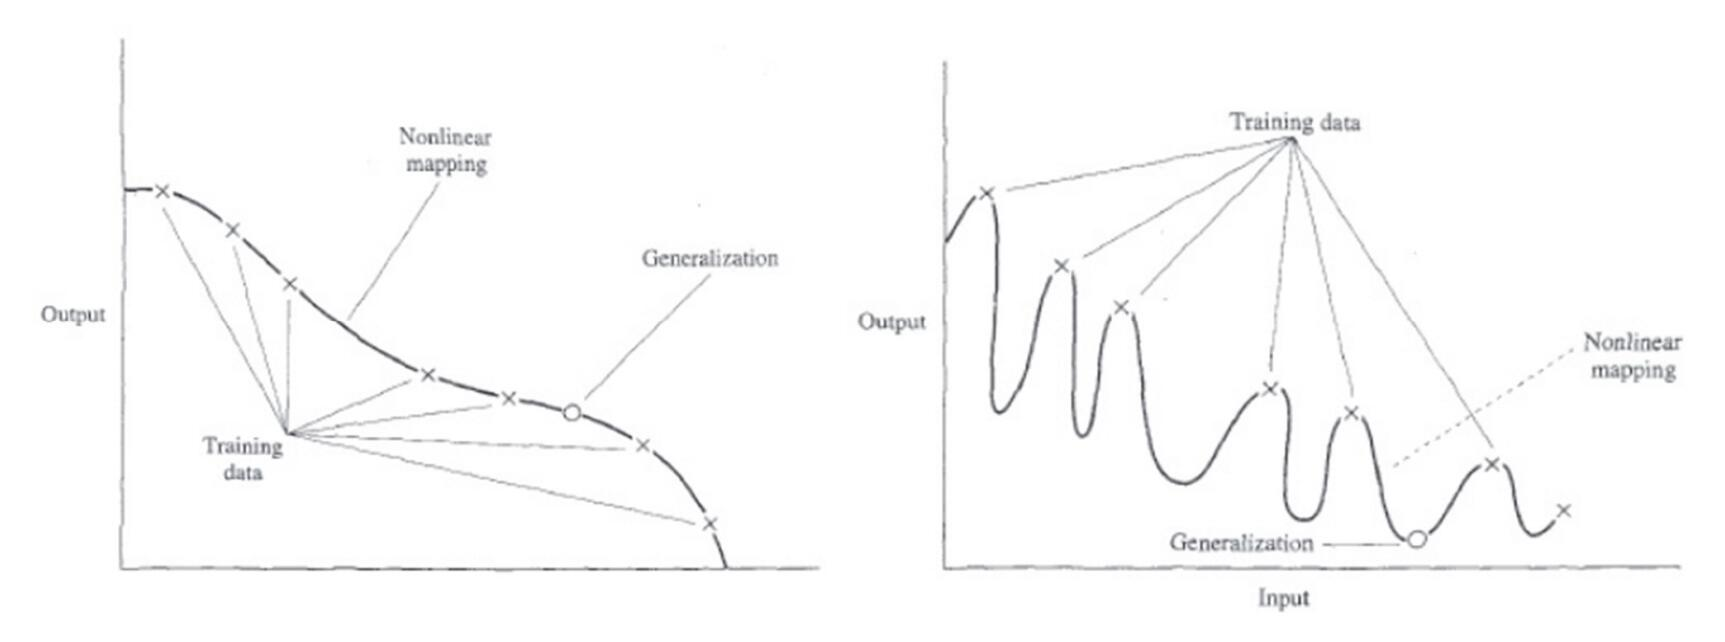

In [17]:
Image(filename = PATH + "overfitting.jpg", width=1000, height=800)

## 5 Conclusion
When we discuss prediction models, prediction errors can be decomposed into two main subcomponents we care about: error due to "bias" and error due to "variance". There is a tradeoff between a model's ability to minimize bias and variance. Understanding these two types of error can help us diagnose model results and avoid the mistake of over-fitting or under-fitting.

## References

#### Understanding the Bias-Variance Tradeoff : http://scott.fortmann-roe.com/docs/BiasVariance.html
#### Stanford Engineering Everywhere CS229 - Machine Learning : https://see.stanford.edu/Course/CS229/53
#### Cornell Lecture 11: Bias-Variance Tradeoff : http://www.cs.cornell.edu/courses/cs4780/2017sp/lectures/lecturenote11.html